In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [12]:
# Load training and test data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# View first few rows
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# Fill missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Drop unneeded columns
train_df.drop(['Cabin'], axis=1, inplace=True)

# Encode categorical data
train_df['Sex'] = train_df['Sex'].map({'male': 1, 'female': 0}).fillna(0).astype(int)
train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).fillna(0).astype(int)

# Drop non-numeric columns
df = train_df.drop(['Name', 'Ticket', 'PassengerId'], axis=1)


Accuracy: 0.8156424581005587


<Axes: >

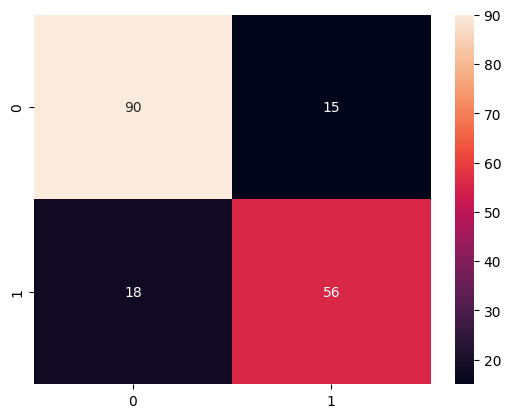

In [14]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

# Evaluate
print("Accuracy:", accuracy_score(y_val, y_pred))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True)


In [15]:
# Clean test data
test_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)
test_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df.drop(['Cabin'], axis=1, inplace=True)

# Encode same way
test_df['Sex'] = test_df['Sex'].map({'male': 1, 'female': 0}).fillna(0).astype(int)
test_df['Embarked'] = test_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).fillna(0).astype(int)

# Final features
X_test = test_df.drop(['Name', 'Ticket', 'PassengerId'], axis=1)


In [16]:
test_pred = model.predict(X_test)

submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_pred
})

submission.to_csv('submission.csv', index=False)
print("✅ submission.csv ready!")


✅ submission.csv ready!
